# 정리
## 결과
1. 당뇨병 예측
    - ```Learning Rate``` : ```0.1```
    - ```loss``` : ```MSE```
    - ```iteration``` **2851회** 부터 loss값은 3000이하로 떨어짐
    - **test데이터에 대한 성능 : 2870.6623956787585**
    - 예측 데이터 시각화
        ![image](https://user-images.githubusercontent.com/48716219/89889035-fb794080-dc0b-11ea-9a72-8f8cdbb48c78.png)  
    <br>  
    <br>
2. 자전거 타기
    - 학습 데이터 별 RMSE값
        1. 요일, hour, weather
            - ```RMSE``` : 155.2688 
        2. 요일, hour, weather, tmp
            - ```RMSE``` : 155.2688 
        3. 요일, hour, weather, humidity
            - ```RMSE``` : 163.2827 
        4. 요일, hour, weather, humidity, temp
            - ```RMSE``` : 151.4418 
        5. 요일, hour, weather, humidity, temp, atemp, season
            - ```RMSE``` : **149.6252**  
<br>
    - 5번째 학습데이터에 대한 예측 결과 데이터 시각화
        1. x축 : X 데이터 중 temp데이터 / y축 : count
            ![image](https://user-images.githubusercontent.com/48716219/89889645-f4066700-dc0c-11ea-92f9-5c284e440400.png)
  
        2. x축 : X 데이터 중 humidity데이터 / y축 : count
            ![image](https://user-images.githubusercontent.com/48716219/89889666-fe286580-dc0c-11ea-8d70-6895d73fd91a.png)


# 1. diabetes_regression

## 1-1) 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## 1-2) 데이터 확인

In [2]:
diabetes_data = load_diabetes()

In [3]:
dir(diabetes_data)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
df_X = diabetes_data['data']
df_y = diabetes_data['target']
df_X.shape, df_y.shape

((442, 10), (442,))

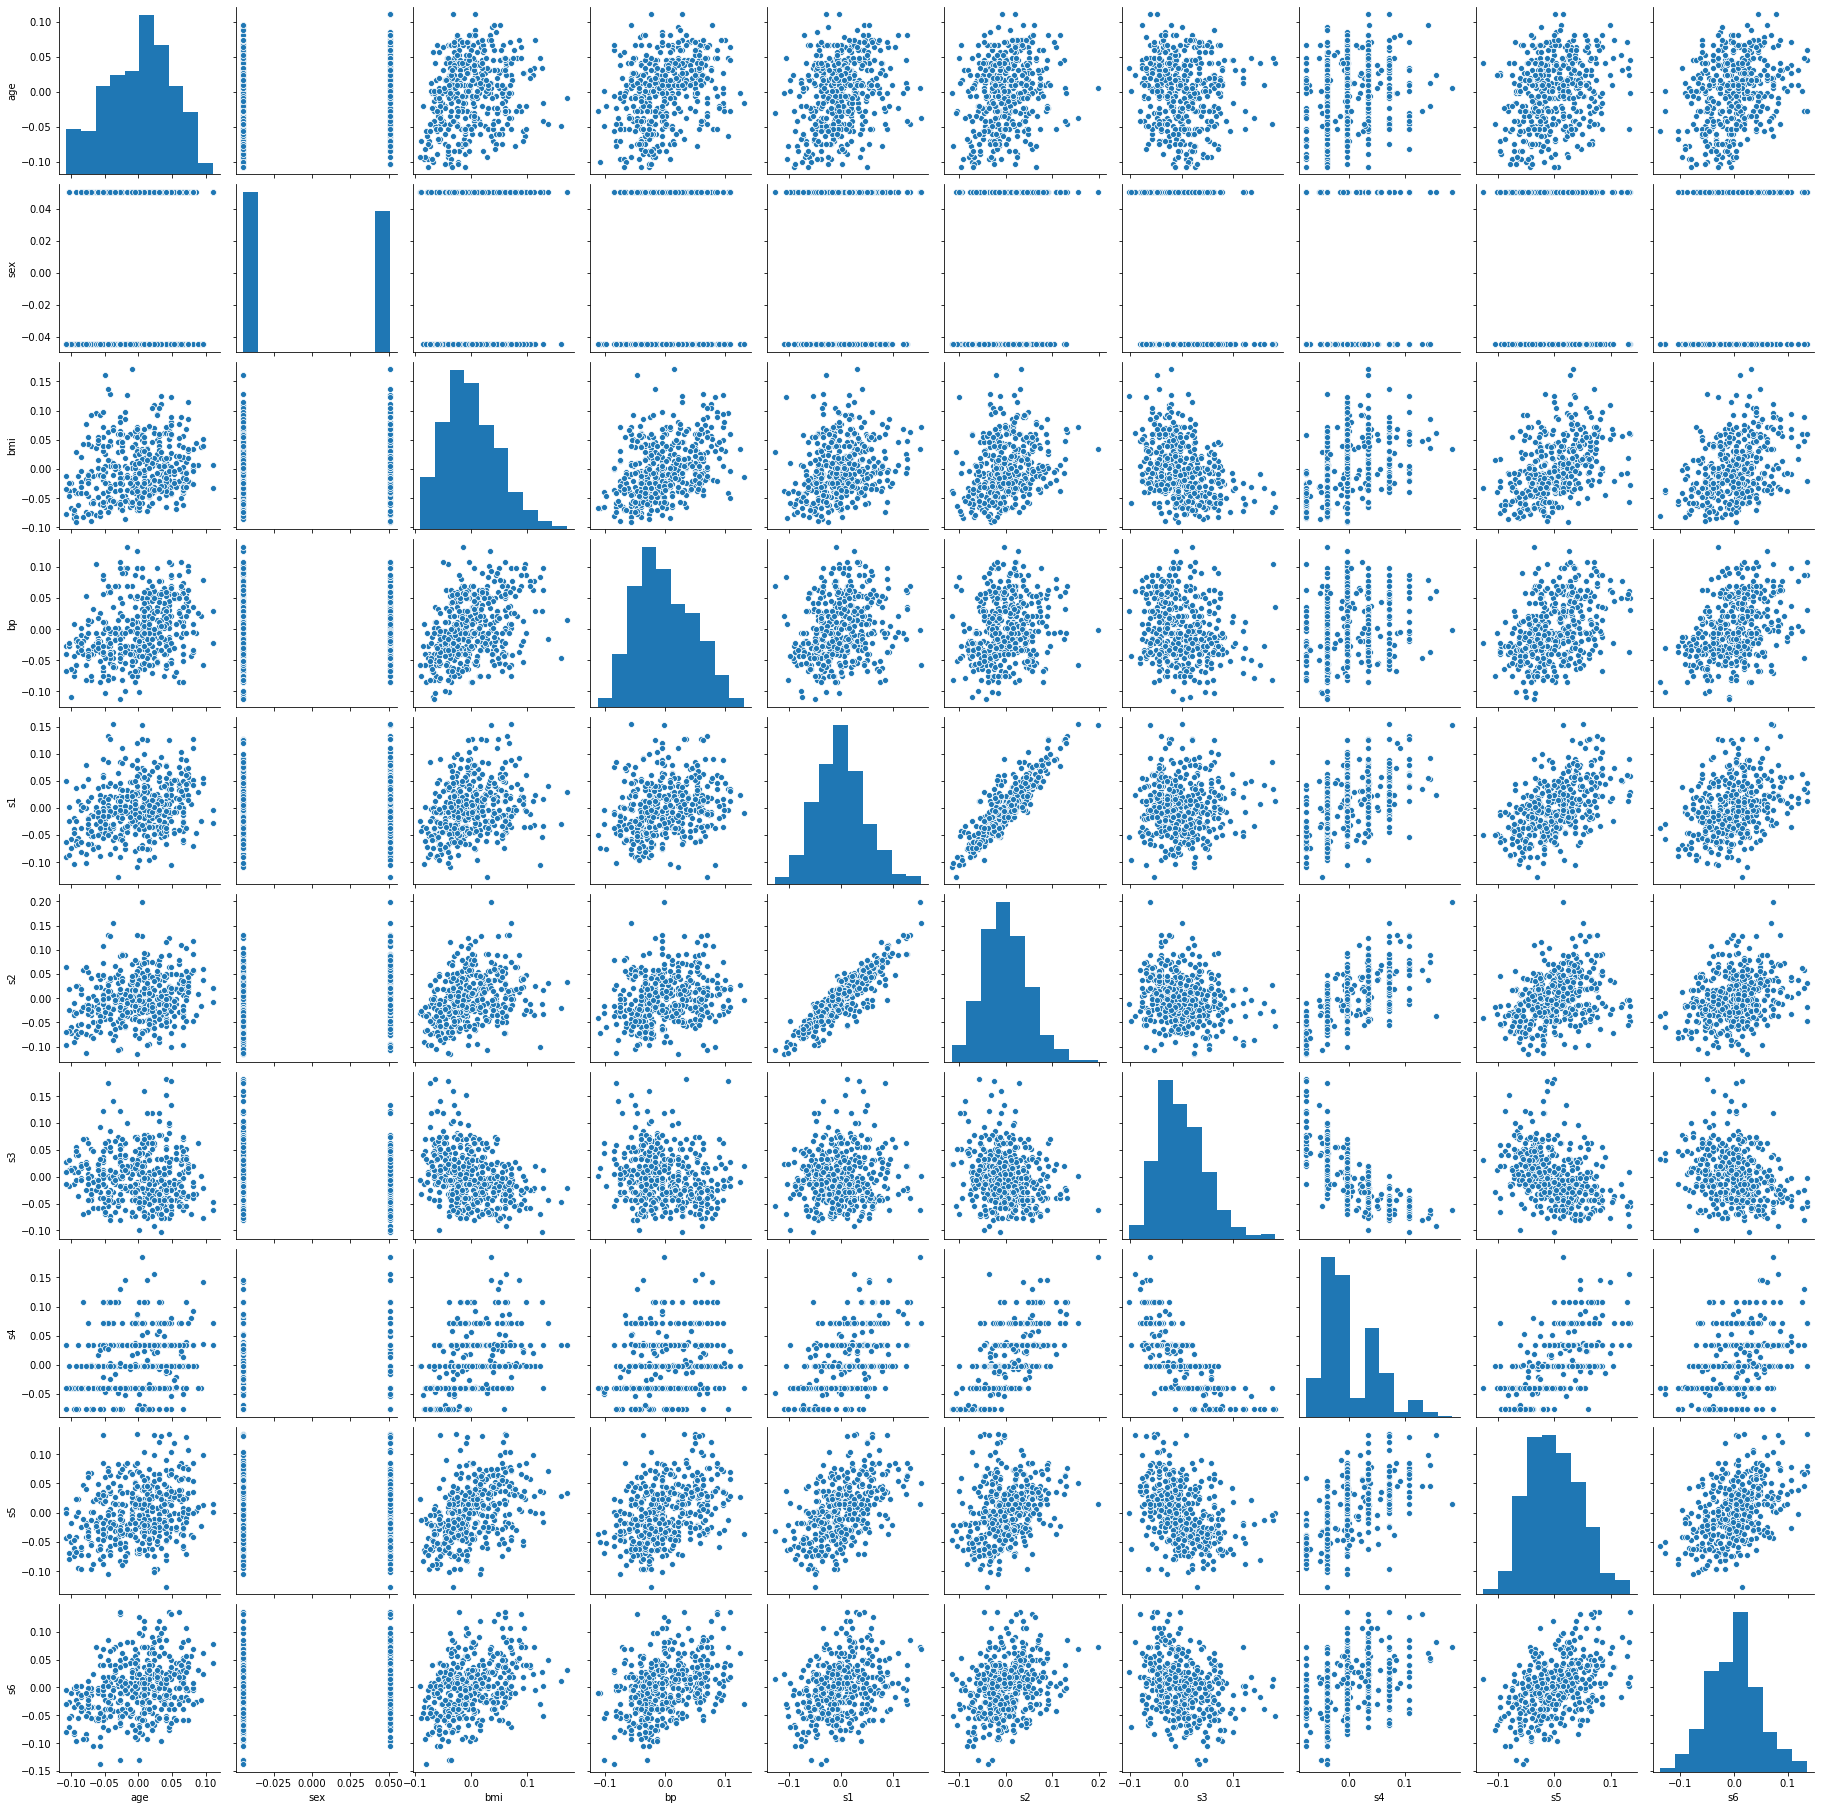

In [5]:
df = pd.DataFrame(df_X, columns=diabetes_data['feature_names'])
sns.pairplot(df)

## 1-3) 모델에 입력할 데이터 준비하기
- ```numpy array```로 변환
- train, test데이터 분리

In [6]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.2, random_state=94)

In [8]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(353, 10) (353,)
(89, 10) (89,)


## 1-4) 모델 준비
- W, b 초기화
- 모델 정의
- loss정의 => MSE 함수로 정의
- gradient 함수 구현

In [9]:
_, l = train_X.shape
W = np.random.rand(l)
b = np.random.rand()
W, b

(array([0.68065199, 0.44864738, 0.86155993, 0.94957381, 0.6951809 ,
        0.4180679 , 0.58071909, 0.2780031 , 0.54995754, 0.38489863]),
 0.5949179415828654)

In [10]:
def model(X, W, b) :
    predictions = 0
#     for i in range(l):
#         predictions += X[:, i] * W[i]
#     predictions += b
    predictions = np.sum([X[:, i] * W[i] for i in range(l)], axis=0) + b
    
    return predictions

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [13]:
def gradient(X, W, b, y) :
    N = len(X)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    
    return dW, db

In [14]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36830766 -0.31097167 -4.28711706 -3.22413724 -1.54279005 -1.26593877
  2.88888148 -3.14475926 -4.13560432 -2.79309068]
db: -303.07713244262607


## 1-5) 학습
- ```Learning Rate```는 ```0.1```으로 설정.
- ```Iteration```횟수는 충분히 많이 준다.
- MSE의 값이 ```3000``` 이하의 점수가 나올 때, 10번정도 ```checks``` 리스트에 저장을 한 후, 반복문을 종료한다.
- 이후 ```checks``` 리스트를 ```iteration``` 횟수와 함께 ```MSE``` 값을 출력해준다.

In [15]:
LEARNING_RATE = 0.1

In [16]:
losses = []
checks = []

for i in range(1, 100001):
    dW, db = gradient(train_X, W, b, train_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i%10 == 0 :
        print('Iteration %d : Loss %0.4f' % (i, L))
    if L <= 3000 :
        checks.append((i, L))
        if len(checks) == 10:
            break

Iteration 10 : Loss 6081.5984
Iteration 20 : Loss 5765.1841
Iteration 30 : Loss 5693.2589
Iteration 40 : Loss 5624.6541
Iteration 50 : Loss 5558.0871
Iteration 60 : Loss 5493.6288
Iteration 70 : Loss 5431.2224
Iteration 80 : Loss 5370.7973
Iteration 90 : Loss 5312.2839
Iteration 100 : Loss 5255.6149
Iteration 110 : Loss 5200.7255
Iteration 120 : Loss 5147.5532
Iteration 130 : Loss 5096.0377
Iteration 140 : Loss 5046.1212
Iteration 150 : Loss 4997.7476
Iteration 160 : Loss 4950.8631
Iteration 170 : Loss 4905.4158
Iteration 180 : Loss 4861.3556
Iteration 190 : Loss 4818.6344
Iteration 200 : Loss 4777.2057
Iteration 210 : Loss 4737.0246
Iteration 220 : Loss 4698.0481
Iteration 230 : Loss 4660.2346
Iteration 240 : Loss 4623.5439
Iteration 250 : Loss 4587.9375
Iteration 260 : Loss 4553.3781
Iteration 270 : Loss 4519.8297
Iteration 280 : Loss 4487.2579
Iteration 290 : Loss 4455.6292
Iteration 300 : Loss 4424.9116
Iteration 310 : Loss 4395.0739
Iteration 320 : Loss 4366.0864
Iteration 330 : L

In [17]:
print("MSE 3000이하\n"+'-'*30)
for num, score in checks :
    print("Iteration {} : Loss : {:.4f}".format(num, score))

MSE 3000이하
------------------------------
Iteration 2851 : Loss : 2999.9602
Iteration 2852 : Loss : 2999.8771
Iteration 2853 : Loss : 2999.7940
Iteration 2854 : Loss : 2999.7110
Iteration 2855 : Loss : 2999.6281
Iteration 2856 : Loss : 2999.5452
Iteration 2857 : Loss : 2999.4624
Iteration 2858 : Loss : 2999.3797
Iteration 2859 : Loss : 2999.2971
Iteration 2860 : Loss : 2999.2145


## 1-6) 결과 예측 및 시각화
- ```loss```값 시각화
- ```test```데이터 예측, loss값(```MSE```) 출력
- ```test```데이터의 예측 후, loss값 시각화

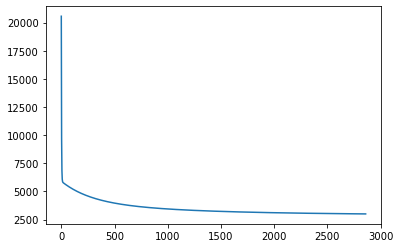

In [18]:
plt.plot(losses)
plt.show()

In [19]:
prediction = model(test_X, W, b)
mse = loss(test_X, W, b, test_y)
mse

2870.6623956787585

In [20]:
test_X.shape, test_y.shape
type(test_y)

numpy.ndarray

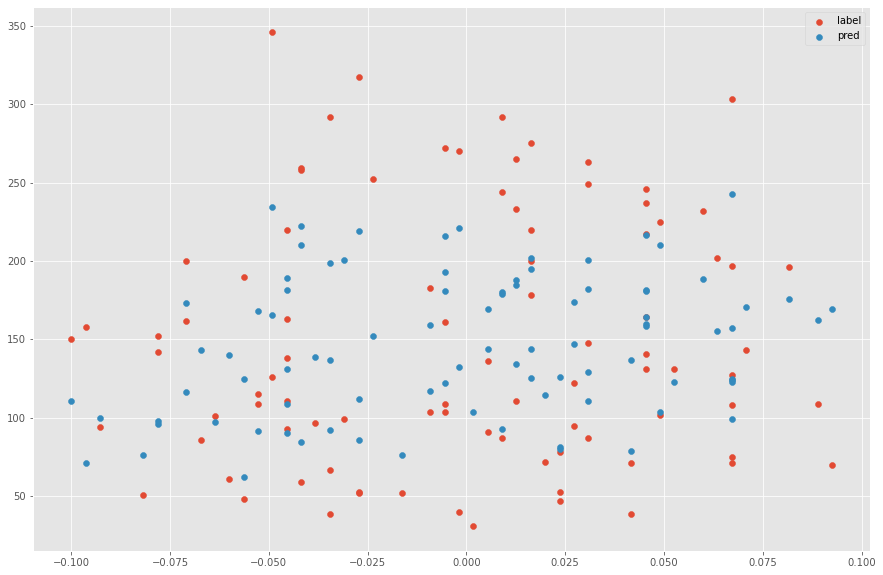

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(test_X[:, 0], test_y, label="label")
plt.scatter(test_X[:, 0], prediction, label="pred")
plt.legend()

plt.show()

# 2. 월요일 오후 3시, 자전거를 타보자

## 2-1)추가 라이브러리 import

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2-2) 데이터 준비
- ```train.csv``` 불러오기
- ```sns.pairplot()``` : 데이터 분포 시각화

In [61]:
train = pd.read_csv('../bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


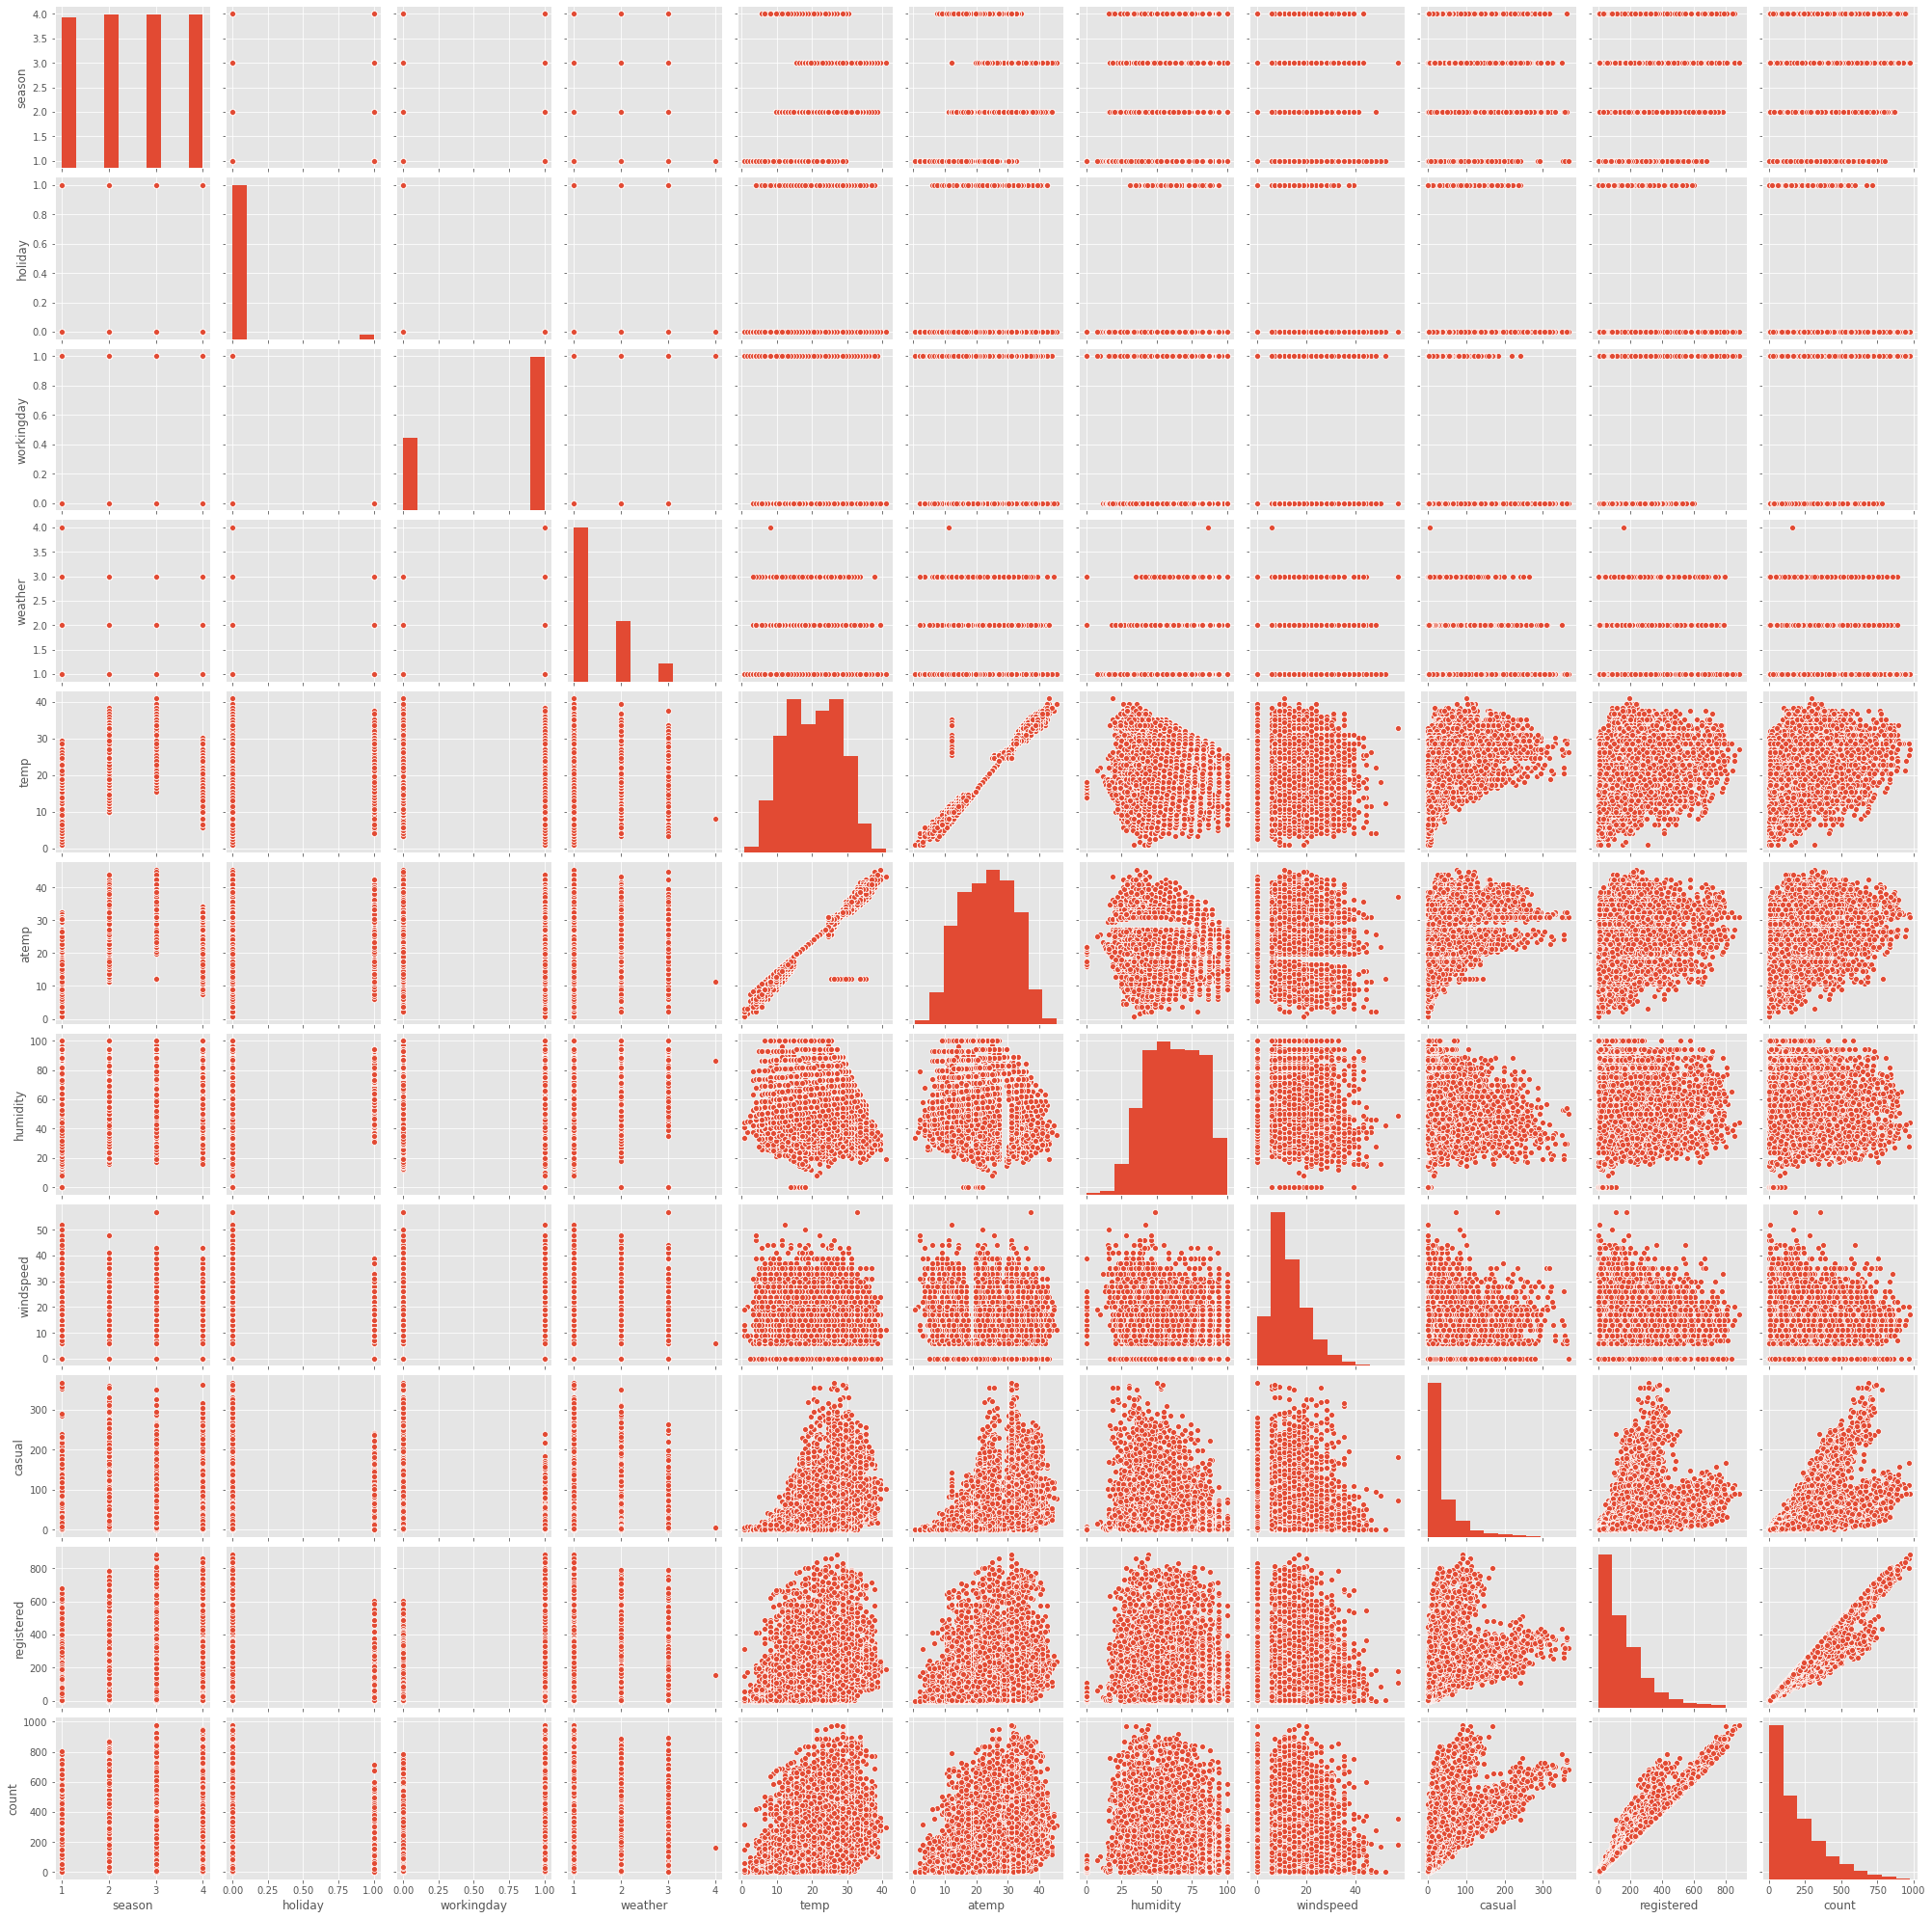

In [62]:
sns.pairplot(train)

### ```datetime``` 컬럼을 ```datetime```자료형으로 변환

In [63]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 6가지 컬럼 생성하기

In [64]:
date_col = ['year', 'month', 'day', 'hour', 'minute', 'second']

for col_name in date_col :
    
    if col_name == 'year':
        train[col_name] = train['datetime'].dt.year
    elif col_name == 'month':
        train[col_name] = train['datetime'].dt.month
    elif col_name == 'day':
        train[col_name] = train['datetime'].dt.day
    elif col_name == 'hour':
        train[col_name] = train['datetime'].dt.hour
    elif col_name == 'minute':
        train[col_name] = train['datetime'].dt.minute
    elif col_name == 'second':
        train[col_name] = train['datetime'].dt.second
        
# map(lambda) 사용하기 => dt빼고

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 데이터 개수 시각화
- ```sns.countplot```, ```subplot```활용
- ```month```. ```day```, ```hour```은 막대 그래프 상위에 값 출력

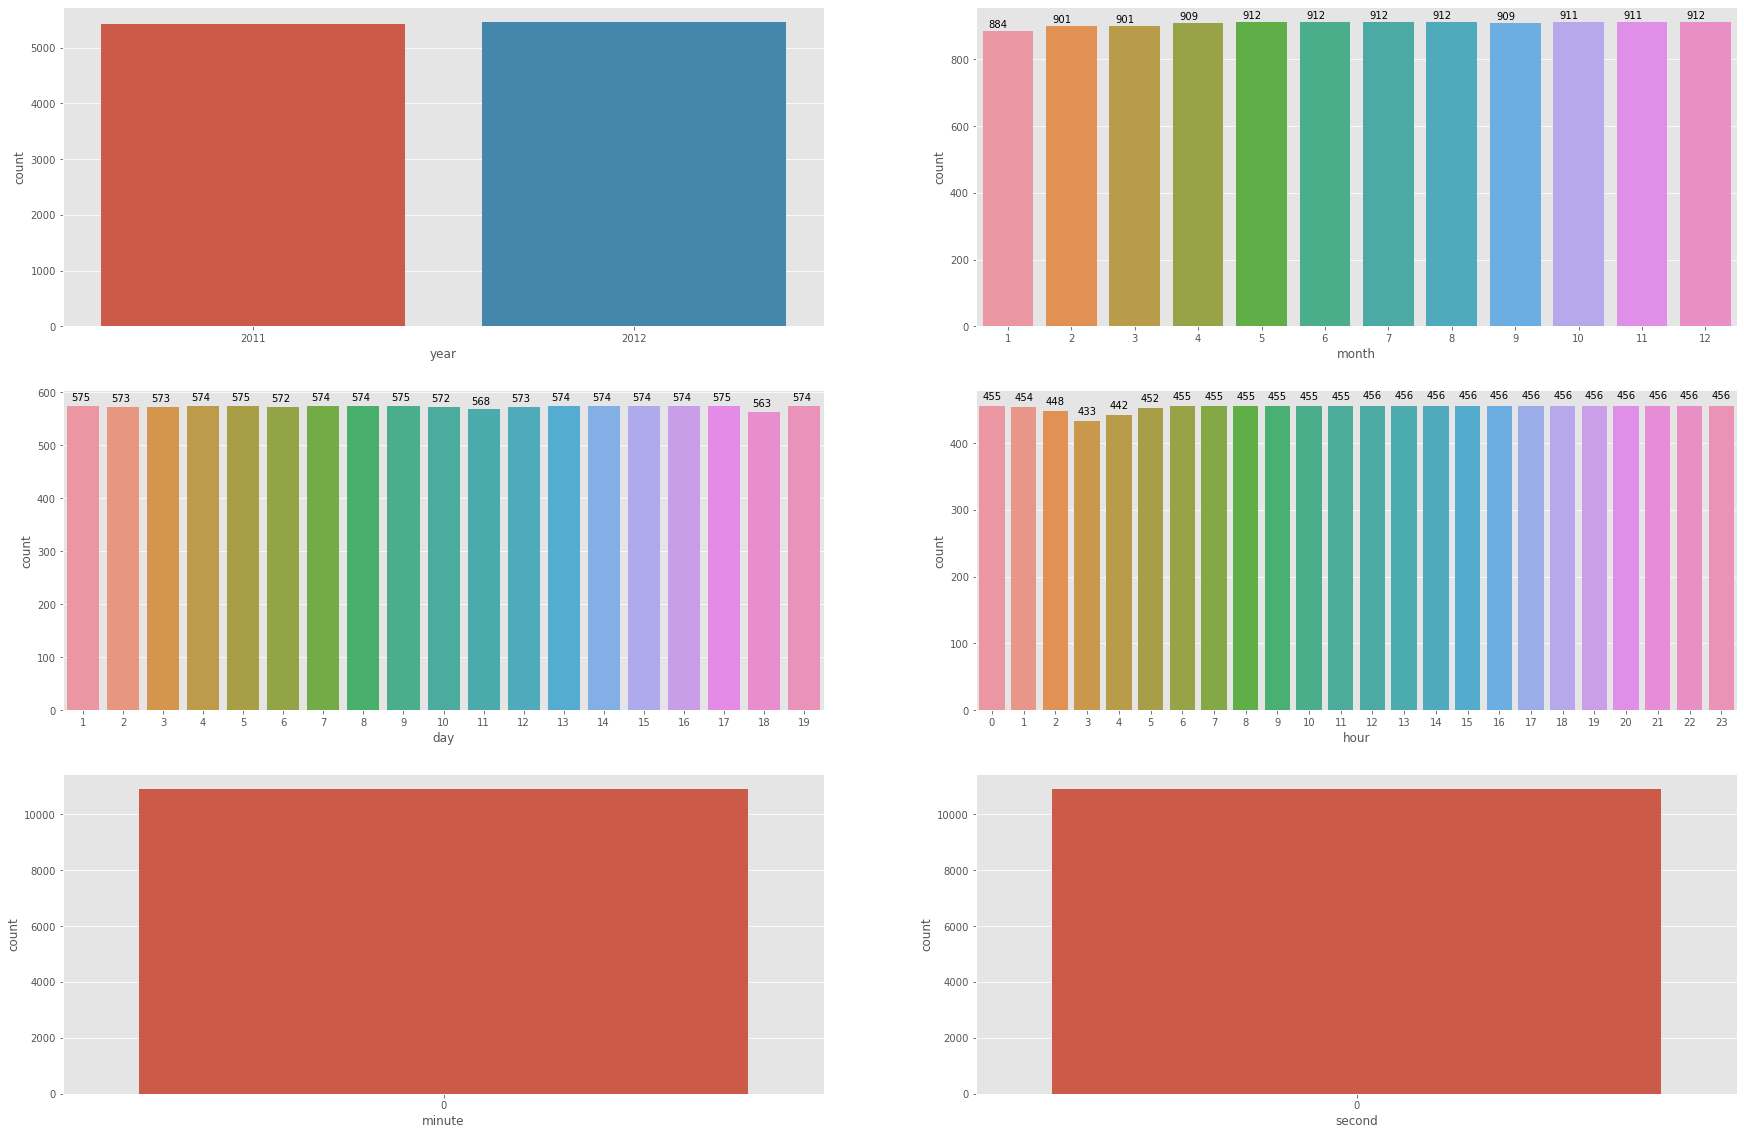

In [65]:
plt.figure(figsize=(30, 20))
for i in range(len(date_col)) :
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(train[date_col[i]])
    
    if i not in  [0, 4, 5]:
        for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

### 데이터 분리
- ```info()```를 통해서 데이터들의 type을 확인 (문자열 데이터 확인)
- ```train['datetime'].dt.weekday``` 활용, **요일**에 대한 정보 추가
- 학습 데이터 및 RMSE값
    1. 요일, 시간, 날씨
        - 167.031365422865
    2. 요일, 시간, 날씨 + ```temp```
        - 155.26878251118987
    3. 요일, 시간, 날씨 + ```humidity```
        - 163.28265800809078
    4. 요일, 시간, 날씨 + ```humidity``` + ```temp```,```atemp``` + ```season```
        - 149.625184945586

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [67]:
# 요일 정보
train['datetime'].dt.weekday

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

## 2-2) 학습 및 예측

### ```model_train```함수 작성
- ```train_test_split``` 활용 : 데이터셋 나누기
- ```LinearRegression``` 모델 생성
- 학습
- 예측 및 MSE, RMSE 확인

In [72]:
def model_train(X, y) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    
    return score, np.sqrt(score)

#### 요일, hour, weather

In [69]:
# 요일 시간 날씨
day = train['datetime'].dt.weekday
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday], axis=1, ignore_index=False)
y = train['count']

In [76]:
X

,hour,weather,datetime
0,0,1,5
1,1,1,5
2,2,1,5
3,3,1,5
4,4,1,5
...,...,...,...
10881,19,1,2
10882,20,1,2
10883,21,1,2
10884,22,1,2


In [81]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 24108.3948
RMSE : 155.2688


---

#### 요일, hour, weather, temp

In [79]:
# 요일 시간 날씨 + temp
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['temp']], axis=1, ignore_index=False)
X

,hour,weather,datetime,temp
0,0,1,5,9.84
1,1,1,5,9.02
2,2,1,5,9.02
3,3,1,5,9.84
4,4,1,5,9.84
...,...,...,...,...
10881,19,1,2,15.58
10882,20,1,2,14.76
10883,21,1,2,13.94
10884,22,1,2,13.94


In [82]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 24108.3948
RMSE : 155.2688


---

#### 요일, hour, weather, humidity

In [84]:
# 요일 시간 날씨 + humidity
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity']], axis=1, ignore_index=False)
X 

,hour,weather,datetime,humidity
0,0,1,5,81
1,1,1,5,80
2,2,1,5,80
3,3,1,5,75
4,4,1,5,75
...,...,...,...,...
10881,19,1,2,50
10882,20,1,2,57
10883,21,1,2,61
10884,22,1,2,61


In [85]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 26661.2264
RMSE : 163.2827


---

#### 요일, hour, weather, humidity, temp

In [86]:
# 요일 시간 날씨 + humidity + temp
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity'], train['temp']], axis=1, ignore_index=False)
X

,hour,weather,datetime,humidity,temp
0,0,1,5,81,9.84
1,1,1,5,80,9.02
2,2,1,5,80,9.02
3,3,1,5,75,9.84
4,4,1,5,75,9.84
...,...,...,...,...,...
10881,19,1,2,50,15.58
10882,20,1,2,57,14.76
10883,21,1,2,61,13.94
10884,22,1,2,61,13.94


In [87]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 22934.6071
RMSE : 151.4418


---

#### 요일, hour, weather, humidity, temp, atemp, season

In [88]:
# 요일 시간 날씨 + humidity + temp, atemp + season
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity'], train['temp'], train['atemp'], train['season']], axis=1, ignore_index=False)
X

,hour,weather,datetime,humidity,temp,atemp,season
0,0,1,5,81,9.84,14.395,1
1,1,1,5,80,9.02,13.635,1
2,2,1,5,80,9.02,13.635,1
3,3,1,5,75,9.84,14.395,1
4,4,1,5,75,9.84,14.395,1
...,...,...,...,...,...,...,...
10881,19,1,2,50,15.58,19.695,4
10882,20,1,2,57,14.76,17.425,4
10883,21,1,2,61,13.94,15.910,4
10884,22,1,2,61,13.94,17.425,4


In [89]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))  

MSE : 22387.6960
RMSE : 149.6252


### 예측결과 시각화
- 위 5가지 데이터 중에서 RMSE 스코어가 가장 낮은 예측 결과로 사용  
<br>  
    1. x축 : X 데이터 중 ```temp```데이터 / y축 : count
    2. x축 : X 데이터 중 ```humidity```데이터 / y축 : count

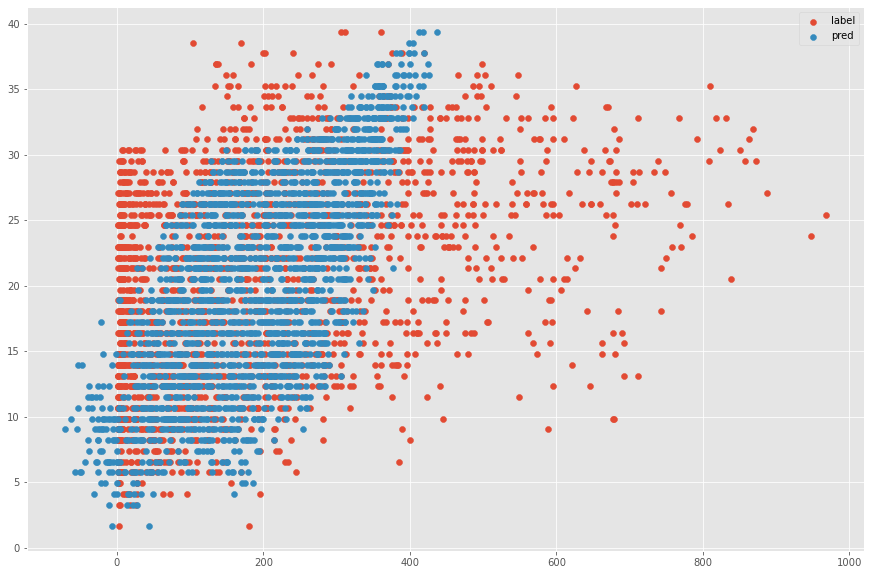

In [90]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(y_test, X_test['temp'], label="label")
plt.scatter(y_pred, X_test['temp'], label="pred")
plt.legend()

plt.show()

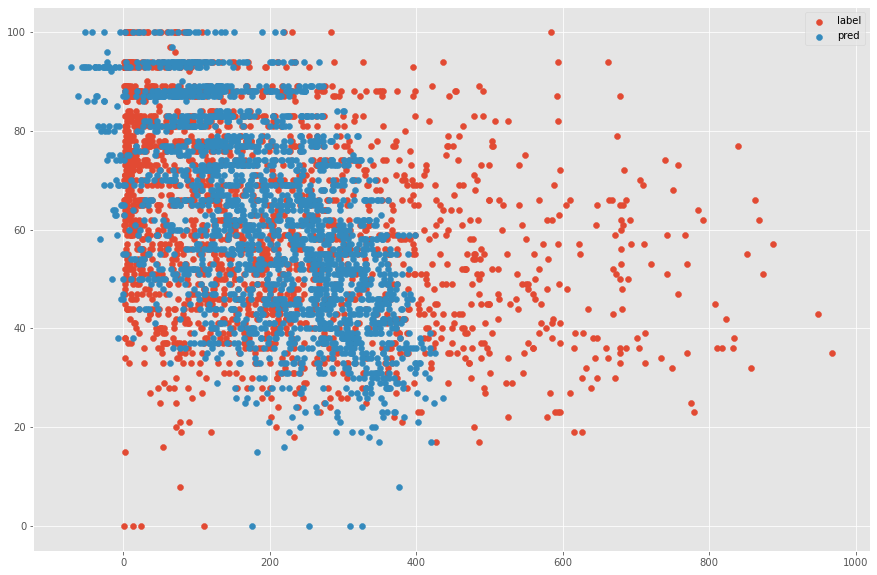

In [91]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(y_test, X_test['humidity'], label="label")
plt.scatter(y_pred, X_test['humidity'], label="pred")
plt.legend()

plt.show()